In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("part1/data.csv")

In [3]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [4]:
data_PM10 = data[data['type'] == 'PM10']
data_PM25 = data[data['type'] == 'PM2,5']

In [5]:
data_PM10

,year,month,day,loc,type,value
0,2019,1,1,Warszawa,PM10,NaN
1,2019,1,2,Warszawa,PM10,NaN
2,2019,1,3,Warszawa,PM10,NaN
3,2019,1,4,Warszawa,PM10,NaN
4,2019,1,5,Warszawa,PM10,NaN
...,...,...,...,...,...,...
33238,2021,12,27,Nowa Ruda,PM10,258.0
33239,2021,12,28,Nowa Ruda,PM10,161.6
33240,2021,12,29,Nowa Ruda,PM10,109.1
33241,2021,12,30,Nowa Ruda,PM10,74.1


In [6]:
months = data_PM10['month'].unique()
years = data_PM10['year'].unique()
cities = data_PM10['loc'].unique()

In [7]:
cities

array(['Warszawa', 'Wrocław', 'Gdańsk', 'Kraków', 'Katowice', 'Łódź',
       'Nowa Ruda'], dtype=object)

In [8]:
years = np.sort(years)

In [9]:
years

array([2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [13]:
years = np.delete(years, 2)

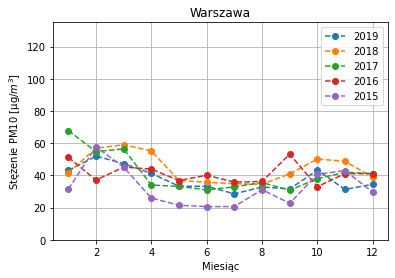

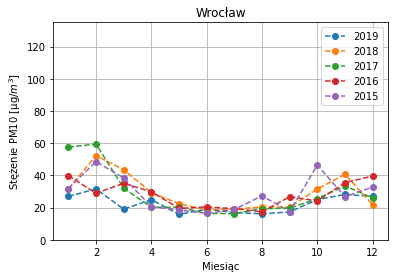

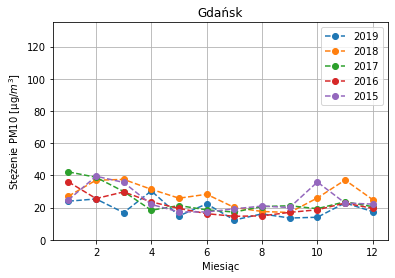

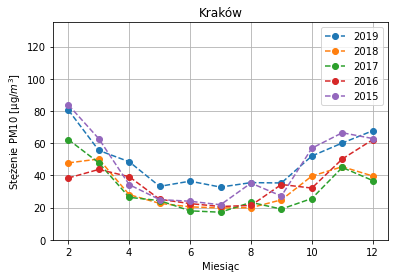

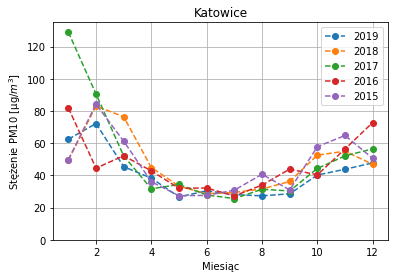

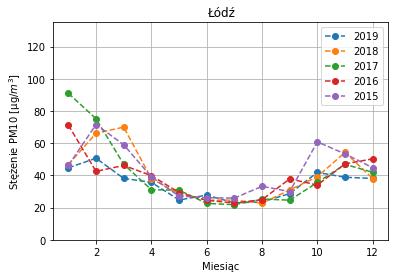

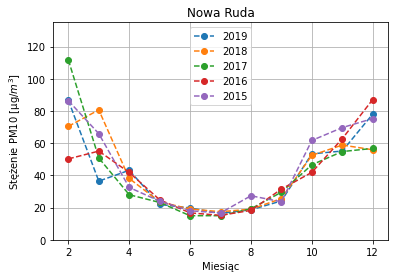

In [51]:
for city in cities:
    df = pd.DataFrame(columns=np.append(years, 'month')[::-1])
    data_by_city = data_PM10[data_PM10['loc'] == city]
    data_by_city = data_by_city.dropna()
    if city != 'Kraków' and city != 'Nowa Ruda':
        for month in months:
            data_by_city_month = data_by_city[data_by_city['month'] == month]
            row = data_by_city_month.groupby('year')['value'].mean().reset_index()
            df.loc[len(df)] = np.insert(row['value'].values,0, month)
        for year in years:
            plt.plot(months, df[str(year)], 'o--', label=year)
    else:
        for month in months[1:]:
            data_by_city_month = data_by_city[data_by_city['month'] == month]
            row = data_by_city_month.groupby('year')['value'].mean().reset_index()
            df.loc[len(df)] = np.insert(row['value'].values,0, month)
        for year in years:
            plt.plot(months[1:], df[str(year)], 'o--', label=year)

    plt.title(city)
    plt.legend()
    plt.grid()
    plt.xlabel('Miesiąc')
    plt.ylabel('Stężenie PM10 [μg/$m^3$]')
    plt.ylim(0,135)
    #plt.savefig(f'plots/PM10_monthly_{city}.png')
    plt.show()

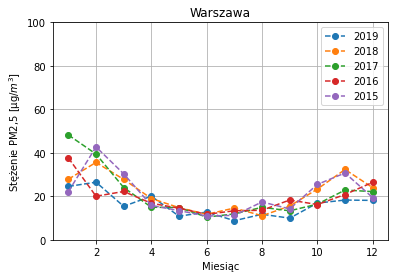

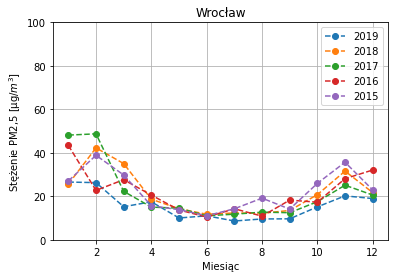

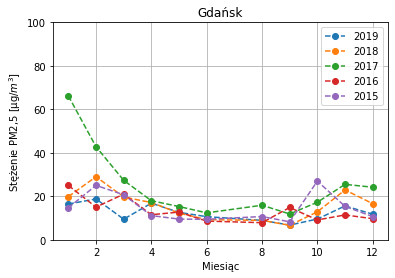

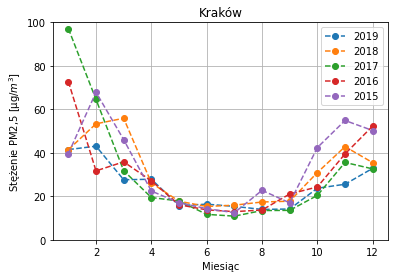

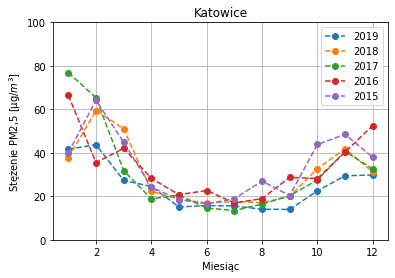

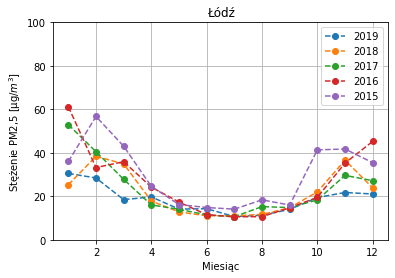

In [52]:
for city in cities[:-1]:
    df = pd.DataFrame(columns=np.append(years, 'month')[::-1])
    data_by_city = data_PM25[data_PM25['loc'] == city]
    data_by_city = data_by_city.dropna()
    if city != 'Gdańsk' and city != 'Nowa Ruda':
        for month in months:
            data_by_city_month = data_by_city[data_by_city['month'] == month]
            row = data_by_city_month.groupby('year')['value'].mean().reset_index()
            df.loc[len(df)] = np.insert(row['value'].values,0, month)
        for year in years:
            plt.plot(months, df[str(year)], 'o--', label=year)
    elif city == 'Gdańsk':
        for month in np.delete(months, 6):
            data_by_city_month = data_by_city[data_by_city['month'] == month]
            row = data_by_city_month.groupby('year')['value'].mean().reset_index()
            df.loc[len(df)] = np.insert(row['value'].values,0, month)
        for year in years:
            plt.plot(np.delete(months, 6), df[str(year)], 'o--', label=year)
    plt.title(city)
    plt.legend()
    plt.grid()
    plt.xlabel('Miesiąc')
    plt.ylabel('Stężenie PM2,5 [μg/$m^3$]')
    plt.ylim(0,100)
    plt.savefig(f'plots/PM25_monthly_{city}.png')
    plt.show()

In [41]:
data.loc[(data['loc'] == 'Nowa Ruda') & (data['year'] == 2019) & (data['type'] == 'PM2,5') & (data['month'] == 3)  ]

,year,month,day,loc,type,value
4804,2019,3,1,Nowa Ruda,"PM2,5",NaN
4805,2019,3,2,Nowa Ruda,"PM2,5",NaN
4806,2019,3,3,Nowa Ruda,"PM2,5",NaN
4807,2019,3,4,Nowa Ruda,"PM2,5",NaN
4808,2019,3,5,Nowa Ruda,"PM2,5",NaN
4809,2019,3,6,Nowa Ruda,"PM2,5",NaN
4810,2019,3,7,Nowa Ruda,"PM2,5",NaN
4811,2019,3,8,Nowa Ruda,"PM2,5",NaN
4812,2019,3,9,Nowa Ruda,"PM2,5",NaN
4813,2019,3,10,Nowa Ruda,"PM2,5",NaN


In [2]:
years = ['2015', '2016', '2017', '2018', '2019']
months = ['01','02','03','04','05','06','07','08','09','10','11','12']

labels = []

for y in years:
    for m in months:
        labels.append(y+' '+m)

In [3]:
labels

['2015 01',
 '2015 02',
 '2015 03',
 '2015 04',
 '2015 05',
 '2015 06',
 '2015 07',
 '2015 08',
 '2015 09',
 '2015 10',
 '2015 11',
 '2015 12',
 '2016 01',
 '2016 02',
 '2016 03',
 '2016 04',
 '2016 05',
 '2016 06',
 '2016 07',
 '2016 08',
 '2016 09',
 '2016 10',
 '2016 11',
 '2016 12',
 '2017 01',
 '2017 02',
 '2017 03',
 '2017 04',
 '2017 05',
 '2017 06',
 '2017 07',
 '2017 08',
 '2017 09',
 '2017 10',
 '2017 11',
 '2017 12',
 '2018 01',
 '2018 02',
 '2018 03',
 '2018 04',
 '2018 05',
 '2018 06',
 '2018 07',
 '2018 08',
 '2018 09',
 '2018 10',
 '2018 11',
 '2018 12',
 '2019 01',
 '2019 02',
 '2019 03',
 '2019 04',
 '2019 05',
 '2019 06',
 '2019 07',
 '2019 08',
 '2019 09',
 '2019 10',
 '2019 11',
 '2019 12']

# Weather data

https://www.ecad.eu/dailydata/predefinedseries.php#

humidity - g/m^3

wind - m/s

temperature - C

In [98]:
temp_data = pd.read_csv('Data/wilgotnosc.csv')

In [99]:
temp_data

,STAID,SOUID,DATE,HU,Q_HU
0,209,140653,20000101,96,0
1,209,140632,20000102,92,0
2,209,140653,20000103,98,0
3,209,140632,20000104,100,0
4,209,140653,20000105,95,0
...,...,...,...,...,...
33723,25133,140049,20230127,79,0
33724,25133,140049,20230128,78,0
33725,25133,140049,20230129,76,0
33726,25133,140049,20230130,77,0


In [100]:
cities = {209: 'Warszawa', 210: 'Wrocław', 25115: 'Gdańsk', 25132: 'Katowice', 25133: 'Kraków'}

def encode_city(id):
    return cities.get(id, 'Undefined')

temp_data['City'] = temp_data['STAID'].apply(encode_city)


In [101]:
temp_data

,STAID,SOUID,DATE,HU,Q_HU,City
0,209,140653,20000101,96,0,Warszawa
1,209,140632,20000102,92,0,Warszawa
2,209,140653,20000103,98,0,Warszawa
3,209,140632,20000104,100,0,Warszawa
4,209,140653,20000105,95,0,Warszawa
...,...,...,...,...,...,...
33723,25133,140049,20230127,79,0,Kraków
33724,25133,140049,20230128,78,0,Kraków
33725,25133,140049,20230129,76,0,Kraków
33726,25133,140049,20230130,77,0,Kraków


In [102]:
temp_data = temp_data.drop('STAID', axis=1)
temp_data = temp_data.drop('SOUID', axis=1)

In [103]:
temp_data.columns

Index(['DATE', 'HU', 'Q_HU', 'City'], dtype='object')

In [104]:
temp_data

,DATE,HU,Q_HU,City
0,20000101,96,0,Warszawa
1,20000102,92,0,Warszawa
2,20000103,98,0,Warszawa
3,20000104,100,0,Warszawa
4,20000105,95,0,Warszawa
...,...,...,...,...
33723,20230127,79,0,Kraków
33724,20230128,78,0,Kraków
33725,20230129,76,0,Kraków
33726,20230130,77,0,Kraków


In [105]:
get_day = lambda x: int(str(x)[-2:])
get_month = lambda x: int(str(x)[4:6])
get_year = lambda x: int(str(x)[:4])

temp_data['DAY'] = temp_data['DATE'].apply(get_day)
temp_data['MONTH'] = temp_data['DATE'].apply(get_month)
temp_data['YEAR'] = temp_data['DATE'].apply(get_year)
temp_data

,DATE,HU,Q_HU,City,DAY,MONTH,YEAR
0,20000101,96,0,Warszawa,1,1,2000
1,20000102,92,0,Warszawa,2,1,2000
2,20000103,98,0,Warszawa,3,1,2000
3,20000104,100,0,Warszawa,4,1,2000
4,20000105,95,0,Warszawa,5,1,2000
...,...,...,...,...,...,...,...
33723,20230127,79,0,Kraków,27,1,2023
33724,20230128,78,0,Kraków,28,1,2023
33725,20230129,76,0,Kraków,29,1,2023
33726,20230130,77,0,Kraków,30,1,2023


In [106]:
temp_data = temp_data.drop('DATE', axis=1)

In [107]:
temp_data

,HU,Q_HU,City,DAY,MONTH,YEAR
0,96,0,Warszawa,1,1,2000
1,92,0,Warszawa,2,1,2000
2,98,0,Warszawa,3,1,2000
3,100,0,Warszawa,4,1,2000
4,95,0,Warszawa,5,1,2000
...,...,...,...,...,...,...
33723,79,0,Kraków,27,1,2023
33724,78,0,Kraków,28,1,2023
33725,76,0,Kraków,29,1,2023
33726,77,0,Kraków,30,1,2023


In [108]:
temp_data.columns

Index(['HU', 'Q_HU', 'City', 'DAY', 'MONTH', 'YEAR'], dtype='object')

In [109]:
temp_data = temp_data.reindex(columns=['City', 'DAY', 'MONTH', 'YEAR','HU', 'Q_HU'])

In [110]:
temp_data = temp_data.rename(columns={'HU': 'Humidity', 'Q_HU':'Quality_humidity'})

In [111]:
temp_data['Humidity'] = temp_data['Humidity'].mul(.1)

In [112]:
temp_data['Humidity'] = temp_data['Humidity'].round(5)

In [113]:
temp_data

,City,DAY,MONTH,YEAR,Humidity,Quality_humidity
0,Warszawa,1,1,2000,9.6,0
1,Warszawa,2,1,2000,9.2,0
2,Warszawa,3,1,2000,9.8,0
3,Warszawa,4,1,2000,10.0,0
4,Warszawa,5,1,2000,9.5,0
...,...,...,...,...,...,...
33723,Kraków,27,1,2023,7.9,0
33724,Kraków,28,1,2023,7.8,0
33725,Kraków,29,1,2023,7.6,0
33726,Kraków,30,1,2023,7.7,0


In [116]:
temp_data = temp_data[temp_data['Quality_humidity'] == 0]

In [117]:
temp_data.to_csv('Data/average_daily_humidity.csv', index=False)

# Merging data to one DF

In [136]:
temp = pd.read_csv('Data/average_daily_temperature.csv')
wind = pd.read_csv('Data/average_daily_wind_speed.csv')
humid = pd.read_csv('Data/average_daily_humidity.csv')

In [137]:
temp

,City,DAY,MONTH,YEAR,Temperature
0,Warszawa,1,1,2000,-0.9
1,Warszawa,2,1,2000,-5.9
2,Warszawa,3,1,2000,1.2
3,Warszawa,4,1,2000,2.3
4,Warszawa,5,1,2000,2.5
...,...,...,...,...,...
42205,Kraków,24,2,2023,8.3
42206,Kraków,25,2,2023,4.3
42207,Kraków,26,2,2023,0.7
42208,Kraków,27,2,2023,0.1


In [138]:
wind

,City,DAY,MONTH,YEAR,Wind
0,Warszawa,1,1,2000,2.3
1,Warszawa,2,1,2000,0.0
2,Warszawa,3,1,2000,4.5
3,Warszawa,4,1,2000,0.0
4,Warszawa,5,1,2000,5.7
...,...,...,...,...,...
42180,Kraków,24,2,2023,1.6
42181,Kraków,25,2,2023,5.2
42182,Kraków,26,2,2023,2.7
42183,Kraków,27,2,2023,2.5


In [139]:
humid

,City,DAY,MONTH,YEAR,Humidity
0,Warszawa,1,1,2000,9.6
1,Warszawa,2,1,2000,9.2
2,Warszawa,3,1,2000,9.8
3,Warszawa,4,1,2000,10.0
4,Warszawa,5,1,2000,9.5
...,...,...,...,...,...
21544,Kraków,27,1,2023,7.9
21545,Kraków,28,1,2023,7.8
21546,Kraków,29,1,2023,7.6
21547,Kraków,30,1,2023,7.7


In [141]:
temp_wind = pd.merge(temp, wind, on=['City', 'DAY', 'MONTH', 'YEAR'], how='outer')
result = pd.merge(temp_wind, humid, on=['City', 'DAY', 'MONTH', 'YEAR'], how='outer')

In [142]:
result

,City,DAY,MONTH,YEAR,Temperature,Wind,Humidity
0,Warszawa,1,1,2000,-0.9,2.3,9.6
1,Warszawa,2,1,2000,-5.9,0.0,9.2
2,Warszawa,3,1,2000,1.2,4.5,9.8
3,Warszawa,4,1,2000,2.3,0.0,10.0
4,Warszawa,5,1,2000,2.5,5.7,9.5
...,...,...,...,...,...,...,...
42205,Kraków,24,2,2023,8.3,1.6,NaN
42206,Kraków,25,2,2023,4.3,5.2,NaN
42207,Kraków,26,2,2023,0.7,2.7,NaN
42208,Kraków,27,2,2023,0.1,2.5,NaN


In [143]:
result.to_csv('Data/average_daily_weather.csv', index=False)

In [67]:
q = pd.read_csv('Data/average_daily_weather.csv')
q['City'].unique()

array(['Warszawa', 'Wrocław', 'Gdańsk', 'Katowice', 'Kraków'],
      dtype=object)

# Covid

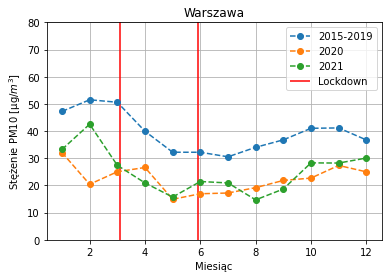

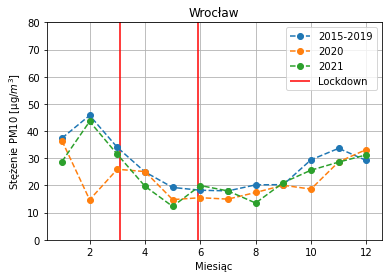

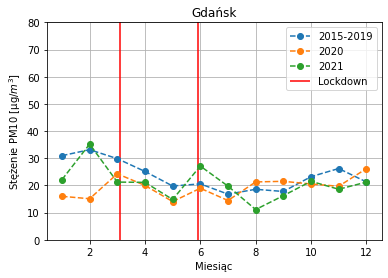

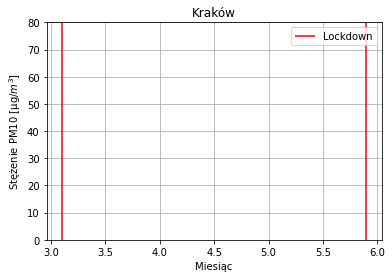

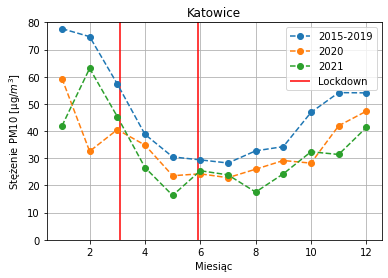

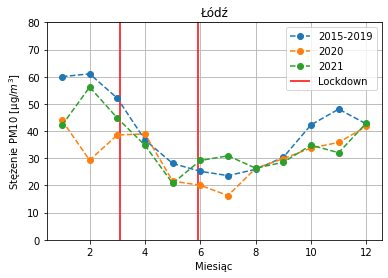

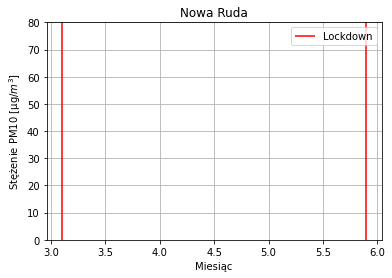

In [11]:
for city in cities:
#    df = pd.DataFrame(columns=np.append(years, 'month')[::-1])
    data_by_city = data_PM10[data_PM10['loc'] == city]
    data_by_city = data_by_city.dropna()
    m_past = []
    m_20 = []
    m_21 = []
    if city != 'Kraków' and city != 'Nowa Ruda':
        for month in months:
            data_by_city_month = data_by_city[data_by_city['month'] == month]
            #print(data_by_city_month)
            m_past.append(data_by_city_month[data_by_city_month["year"]<=2019]['value'].mean())
            m_20.append(data_by_city_month[data_by_city_month["year"]==2020]['value'].mean())
            m_21.append(data_by_city_month[data_by_city_month["year"]==2021]['value'].mean())
            
#             row = data_by_city_month.groupby('year')['value'].mean().reset_index()
#             df.loc[len(df)] = np.insert(row['value'].values,0, month)
#        for year in years:
        plt.plot(months, m_past, 'o--', label='2015-2019')
        plt.plot(months, m_20, 'o--', label='2020')
        plt.plot(months, m_21, 'o--', label='2021')

#     else:
#         for month in months[1:]:
#             data_by_city_month = data_by_city[data_by_city['month'] == month]
#             row = data_by_city_month.groupby('year')['value'].mean().reset_index()
#             df.loc[len(df)] = np.insert(row['value'].values,0, month)
#         for year in years:
#             plt.plot(months[1:], df[str(year)], 'o--', label=year)

    plt.title(city)
    plt.grid()
    plt.xlabel('Miesiąc')
    plt.ylabel('Stężenie PM10 [μg/$m^3$]')
    plt.ylim(0,80)
    plt.vlines(x=3.1, ymin=0, ymax=135, color='red', label='Lockdown')
    plt.vlines(x=5.9, ymin=0, ymax=135, color='red')
    plt.legend()
    plt.savefig(f'plots/PM10_monthly_covid_{city}.png')
    plt.show()

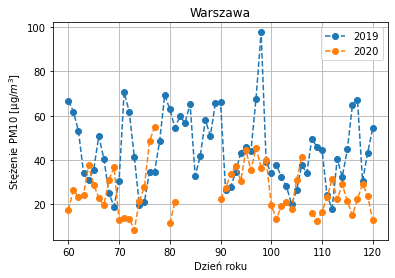

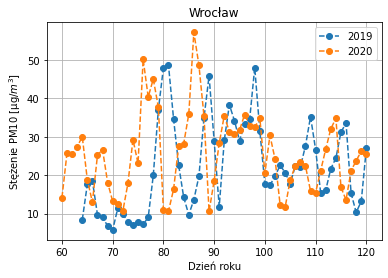

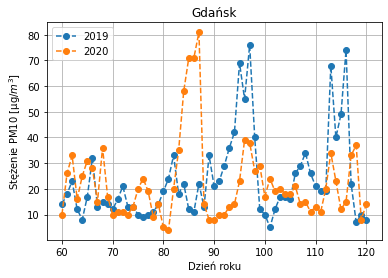

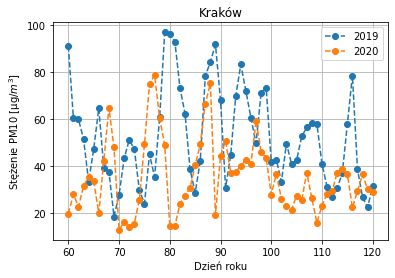

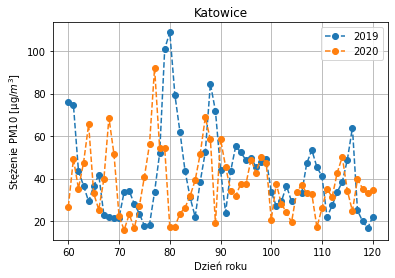

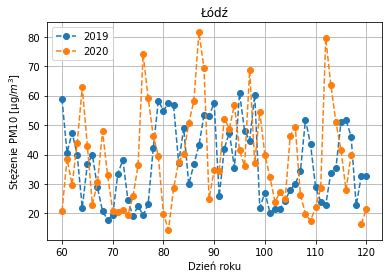

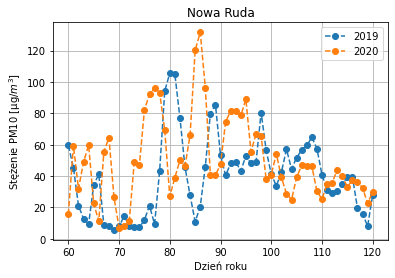

In [63]:
for city in cities:
#    df = pd.DataFrame(columns=np.append(years, 'month')[::-1])
#     data_by_city = data_PM10[data_PM10['loc'] == city]
#     data_by_city = data_by_city.dropna()
    p2019 = data_PM10[(data_PM10['loc'] == city) & (data_PM10['year'] == 2019) & (data_PM10['month'] >= 3) & (data_PM10['month'] <= 4)]['value']
    p2020 = data_PM10[(data_PM10['loc'] == city) & (data_PM10['year'] == 2020) & (data_PM10['month'] >= 3) & (data_PM10['month'] <= 4)]['value']
    p2021 = data_PM10[(data_PM10['loc'] == city) & (data_PM10['year'] == 2021) & (data_PM10['month'] >= 3) & (data_PM10['month'] <= 4)]['value']
#     print(p2019.index+1)
#     print(p2019.values)
    plt.plot(np.array(range(len(p2019.values)))+60, p2019.values,'o--', label='2019')
    plt.plot(np.array(range(len(p2020.values)))+60, p2020.values,'o--', label='2020')
#    plt.plot(range(len(p2021.values)), p2021.values, marker='o', label='2021')
    plt.title(city)
    plt.grid()
    plt.xlabel('Dzień roku')
    plt.ylabel('Stężenie PM10 [μg/$m^3$]')
#     plt.ylim(0,80)
#     plt.vlines(x=3.1, ymin=0, ymax=135, color='red', label='Lockdown')
#     plt.vlines(x=5.9, ymin=0, ymax=135, color='red')
    plt.legend()
    #plt.savefig(f'plots/PM10_daily_covid_{city}.png')
    plt.show()

In [28]:
q = data_PM10[(data_PM10['loc'] == 'Warszawa') & (data_PM10['year'] == 2019) & (data['month'] >= 2) & (data['month'] <= 5)][['day','value']]

<ipython-input-28-186d473cf51e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  q = data_PM10[(data_PM10['loc'] == 'Warszawa') & (data_PM10['year'] == 2019) & (data['month'] >= 2) & (data['month'] <= 5)][['day','value']]


In [36]:
q.index+1

Int64Index([ 32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
            ...
            142, 143, 144, 145, 146, 147, 148, 149, 150, 151],
           dtype='int64', length=120)